In [28]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import IPython.display as ipd

import speech_recognition as sr
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [29]:
file_path = 'audio.wav'
audio, sr = librosa.load(file_path,sr=4000)
# 44100


In [30]:
ipd.Audio(audio,rate=sr)

In [31]:
audio.shape

(112938,)

In [32]:
print("Sample Rate: ",sr)

Sample Rate:  4000


In [33]:
print("Time Duration Of Each Sample: ", 1/sr)

Time Duration Of Each Sample:  0.00025


In [34]:
print("Total Time Duration of Audio: ", (1/sr)*len(audio))

Total Time Duration of Audio:  28.2345


AttributeError: module 'librosa' has no attribute 'rms'

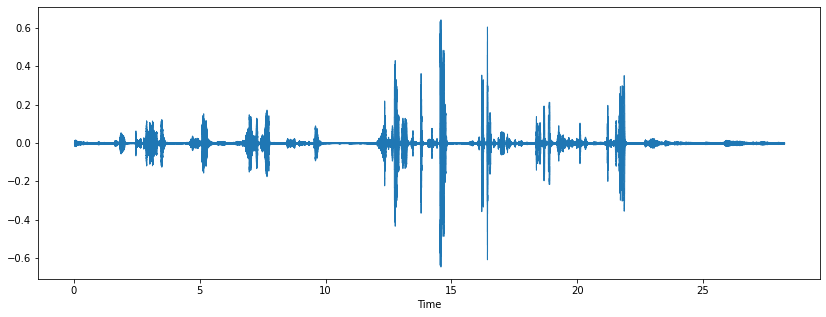

In [50]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
ans =  librosa.feature.rms(audio);
plt.


# 1024
# 512

In [36]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

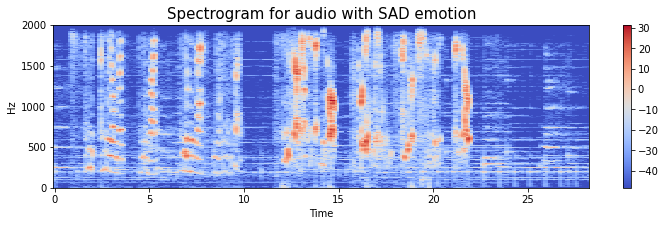

In [37]:
create_spectrogram(audio,sr,"SAD")

In [38]:
def extract_feature(audio, mfcc, chroma, mel):
    print(audio)
    X = audio
    sample_rate=sr
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [39]:
 my_audio_feature = extract_feature(audio,mfcc=True,chroma=True,mel=True)

[-0.00227254 -0.00500701 -0.00478743 ... -0.00072534 -0.00038407
  0.        ]


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/1645599543.py:15: FutureWarning: Pass y=[-0.00227254 -0.00500701 -0.00478743 ... -0.00072534 -0.00038407
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [40]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [41]:



emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']




In [42]:

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("F:\\01 Code\\01 Projects\\SpeechEmotionRecognitionApp\\ser_model\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size,train_size=1-test_size, random_state=9)



In [43]:

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

model.fit(x_train,y_train)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.mels

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8310547e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.         0.         0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00027466 ... -0.00015259 -0.00015259
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  me

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as 

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 9.1552734e-05 ... 2.7465820e-04 2.4414062e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional argumen

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.9274902e-03
 -6.9580078e-03 -6.9274902e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positi

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 3.9672852e-04 -9.1552734e-05 -1.8310547e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  2.1362305e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as 

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  1.8310547e-04 ... -1.8310547e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  1.2207031e-04 ...  6.4086914e-04
  6.4086914e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -2.1362305e-04
 -1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as 

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as 

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional a

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[1.3122559e-03 1.3122559e-03 1.2817383e-03 ... 9.1552734e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -9.1552734e-05 ...  1.2817383e-03
  1.2512207e-03  1.2207031e-03] as keyword args. From version 0.10 passing these as positional a

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027466 0.00024414 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[-1.8310547e-04 -1.2207031e-04 -3.0517578e-05 ... -1.5258789e-04
 -2.1362305e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_6556/4060452756.py:15: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  9.1552734e-05 ...  1.0070801e-03
  1.1901855e-03  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will

(576, 192)
Features extracted: 180


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [46]:
model.predict([my_audio_feature])

array(['disgust'], dtype='<U7')

In [47]:
my_audio_feature.reshape(-1,1)
my_audio_feature.shape

(180,)

In [49]:
my_audio_feature


array([-3.54914154e+02,  3.95982056e+01, -1.42742052e+01, -1.40594521e+01,
       -2.30337429e+01, -1.82462037e+00, -1.43910999e+01, -2.63117552e+00,
       -2.38742352e+01,  6.46781874e+00, -7.45839643e+00,  1.17592537e+00,
       -1.32872019e+01, -1.08058453e+00, -5.61282825e+00,  8.62525082e+00,
       -3.31976986e+00,  9.18970203e+00,  4.74984437e-01,  2.07752562e+00,
       -6.03010702e+00, -2.01233315e+00, -6.31174994e+00,  5.30645514e+00,
       -3.82704020e+00, -2.80888271e+00, -2.41326833e+00,  3.12914133e+00,
        1.04860115e+00,  1.04822087e+00, -5.69117725e-01,  1.09169161e+00,
       -3.53187847e+00,  1.59505904e+00,  7.81295300e+00,  4.89513445e+00,
        5.03280210e+00,  4.96507883e+00, -8.97912085e-01,  3.12672639e+00,
        3.12693149e-01,  3.70882332e-01,  4.91308659e-01,  3.41985017e-01,
        3.65699977e-01,  4.28123921e-01,  5.56747794e-01,  6.05392635e-01,
        4.71949577e-01,  5.50546467e-01,  3.99165303e-01,  3.80375177e-01,
        3.82341049e-03,  